In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
file=pd.read_csv("C:/Users/doaad/Documents/NTI data analysis/Bayut data.csv")
df=pd.DataFrame(file)
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Department_name    1871 non-null   object 
 1   Department_number  1871 non-null   object 
 2   Location           1871 non-null   object 
 3   Unnamed: 3         1871 non-null   object 
 4   Unnamed: 4         1871 non-null   object 
 5   Unnamed: 5         780 non-null    object 
 6   Unnamed: 6         312 non-null    object 
 7   Unnamed: 7         156 non-null    object 
 8   Unnamed: 8         156 non-null    object 
 9   Unnamed: 9         156 non-null    object 
 10  Unnamed: 10        0 non-null      float64
dtypes: float64(1), object(10)
memory usage: 160.9+ KB


In [12]:
file.isna().sum()

Department_name         0
Department_number       0
Location                0
Unnamed: 3              0
Unnamed: 4              0
Unnamed: 5           1091
Unnamed: 6           1559
Unnamed: 7           1715
Unnamed: 8           1715
Unnamed: 9           1715
Unnamed: 10          1871
dtype: int64

In [13]:
df.replace(np.nan," ",inplace=True)

In [14]:
df.isna().sum()

Department_name      0
Department_number    0
Location             0
Unnamed: 3           0
Unnamed: 4           0
Unnamed: 5           0
Unnamed: 6           0
Unnamed: 7           0
Unnamed: 8           0
Unnamed: 9           0
Unnamed: 10          0
dtype: int64

In [15]:
df.describe

<bound method NDFrame.describe of                    Department_name Department_number    Location Unnamed: 3  \
0               Park View Compound    1st Settlement   New Cairo      Cairo   
1     Lake view Residence Compound    5th Settlement   New Cairo      Cairo   
2                Villette Compound    5th Settlement   New Cairo      Cairo   
3                  Mivida Compound    5th Settlement   New Cairo      Cairo   
4                 Eastown Compound    5th Settlement   New Cairo      Cairo   
...                            ...               ...         ...        ...   
1866         Village Gate Compound    5th Settlement   New Cairo      Cairo   
1867  Lake view Residence Compound    5th Settlement   New Cairo      Cairo   
1868     Koronfel Heights Compound    1st Settlement   New Cairo      Cairo   
1869           Cairo Festival City    5th Settlement   New Cairo      Cairo   
1870             Villette Compound    5th Settlement   New Cairo      Cairo   

                 

In [16]:
def merge_and_remove_columns(df, columns_to_merge, new_column_name='Merged'):
    df[new_column_name] = (
        df[columns_to_merge]
        .astype(str)
        .apply(lambda row: ' '.join(val for val in row if val != 'nan'), axis=1)
    )
    df.drop(columns=columns_to_merge, inplace=True)
    return df

columns_to_merge = ['Location', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 
                    'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 
                    'Unnamed: 9', 'Unnamed: 10']

df = merge_and_remove_columns(df, columns_to_merge, new_column_name='Regions')

In [17]:
df.columns

Index(['Department_name', 'Department_number', 'Regions'], dtype='object')

In [60]:
df.describe(include='all')

,Department_name,Department_number,Regions
count,1871,1871,1871
unique,13,2,24
top,Mivida Compound,5th Settlement,New Cairo Cairo 3BR Hotel-Style Apartment wi...
freq,389,1715,78


In [18]:
df_unique = df.drop_duplicates()
df.value_counts().idxmax()

('90 Avenue Compound',
 ' 5th Settlement',
 ' New Cairo  Cairo Apartment for rent in 90 Avenue Compound  fully furnished  distinctive        ')

In [19]:
df.groupby(df["Department_name"])["Department_number"].value_counts()

Department_name                Department_number
90 Avenue Compound             5th Settlement       156
Cairo Festival City            5th Settlement       312
Eastown Compound               5th Settlement        78
Fifth Square Compound          5th Settlement        78
Galleria Moon Valley Compound  5th Settlement        78
Hyde Park New Cairo Compound   5th Settlement        78
Koronfel Heights Compound      1st Settlement        78
Lake view Residence Compound   5th Settlement       234
Mivida Compound                5th Settlement       389
Park View Compound             1st Settlement        78
Ritage Compound                5th Settlement        78
Village Gate Compound          5th Settlement        78
Villette Compound              5th Settlement       156
Name: count, dtype: int64

#What is the distribution of the departments

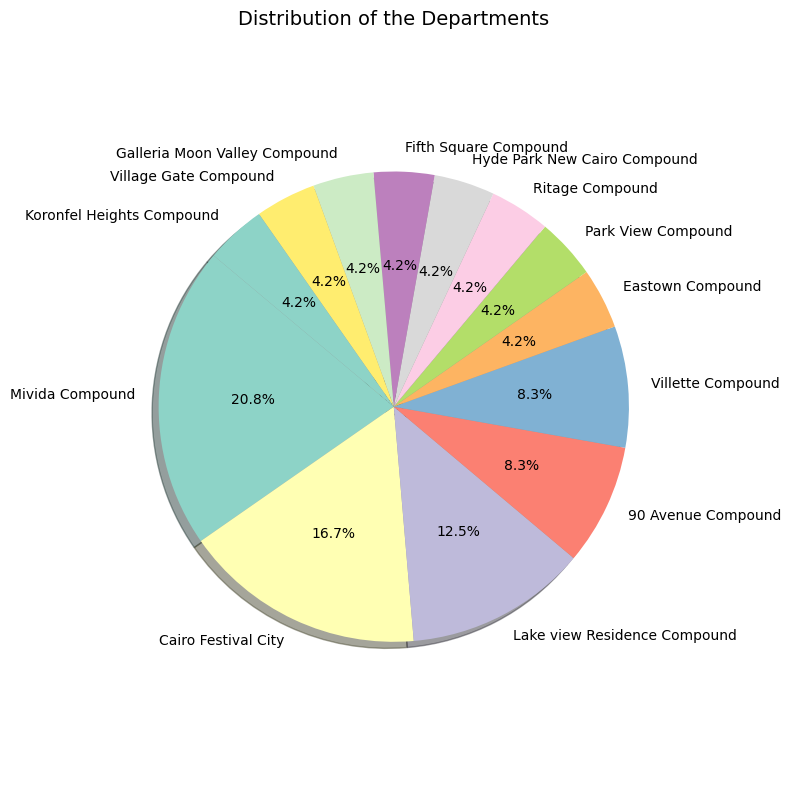

In [9]:
import matplotlib.pyplot as plt

dept_counts = df['Department_name'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(dept_counts,
        labels=dept_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        shadow=True,
        colors=plt.cm.Set3.colors)

plt.title('Distribution of the Departments', fontsize=14)
plt.axis('equal')  
plt.tight_layout()
plt.savefig('C:/Users/doaad/Documents/NTI data analysis/department_distribution.png', format='png', dpi=300)
plt.show()


what is the most common department number across the department names

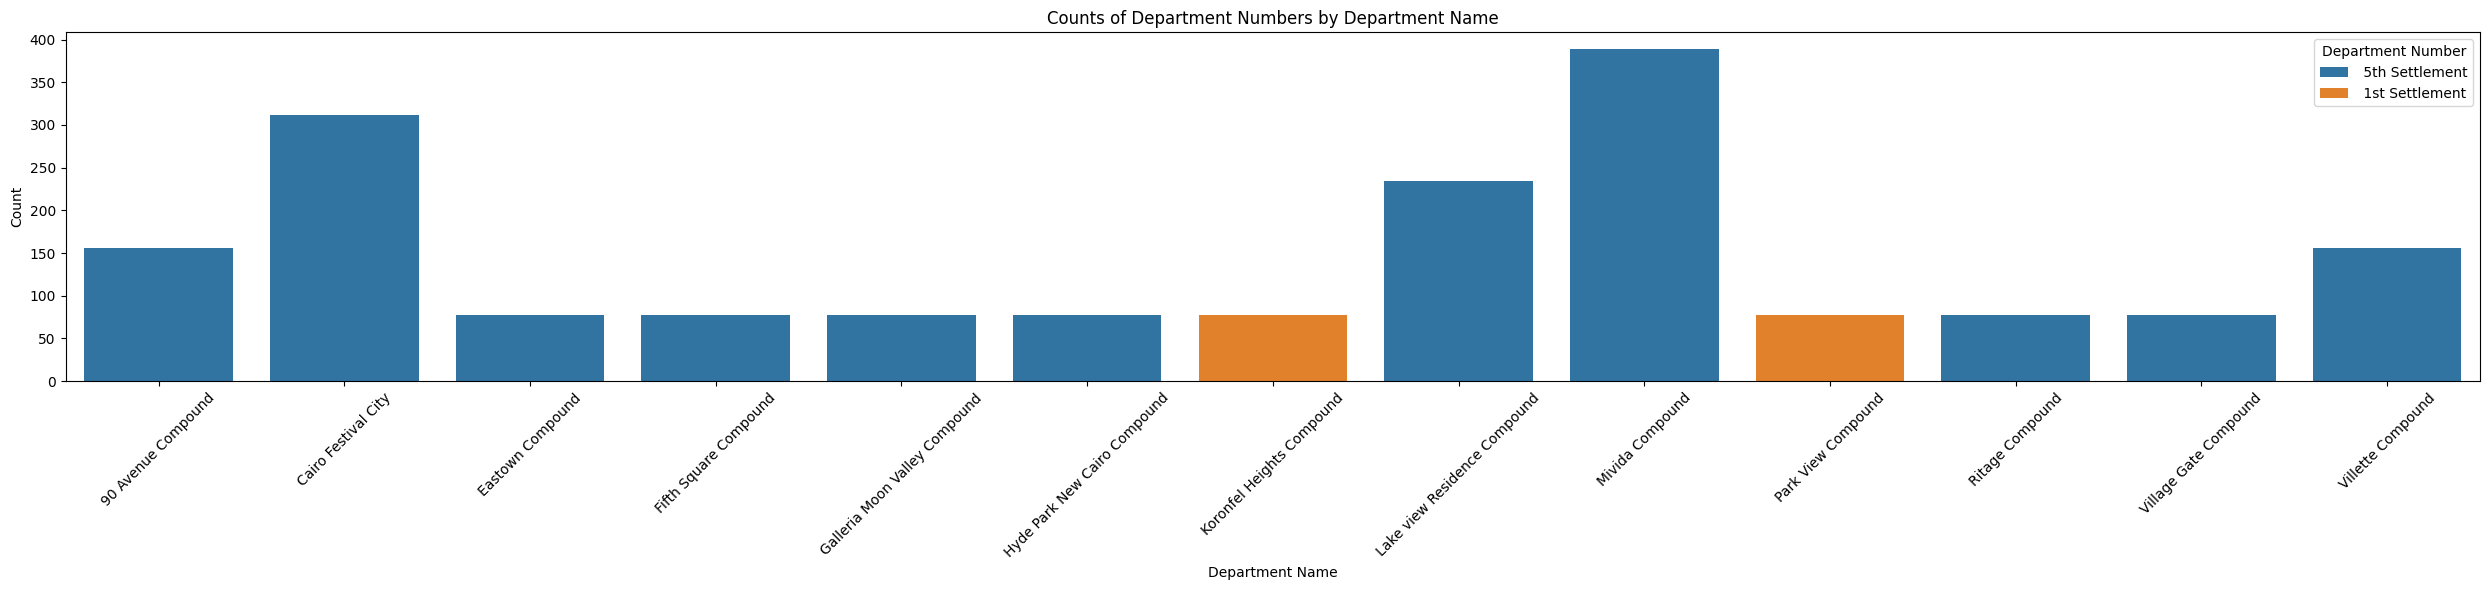

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset the index to turn groupby object into a DataFrame
grouped = df.groupby(['Department_name', 'Department_number']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(25, 6))
sns.barplot(data=grouped, x='Department_name', y='Count', hue='Department_number')

plt.title('Counts of Department Numbers by Department Name')
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.legend(title='Department Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('C:/Users/doaad/Documents/NTI data analysis/Counts_of_Department_Numbers_by_Department_Name.png', format='png', dpi=300)

plt.show()


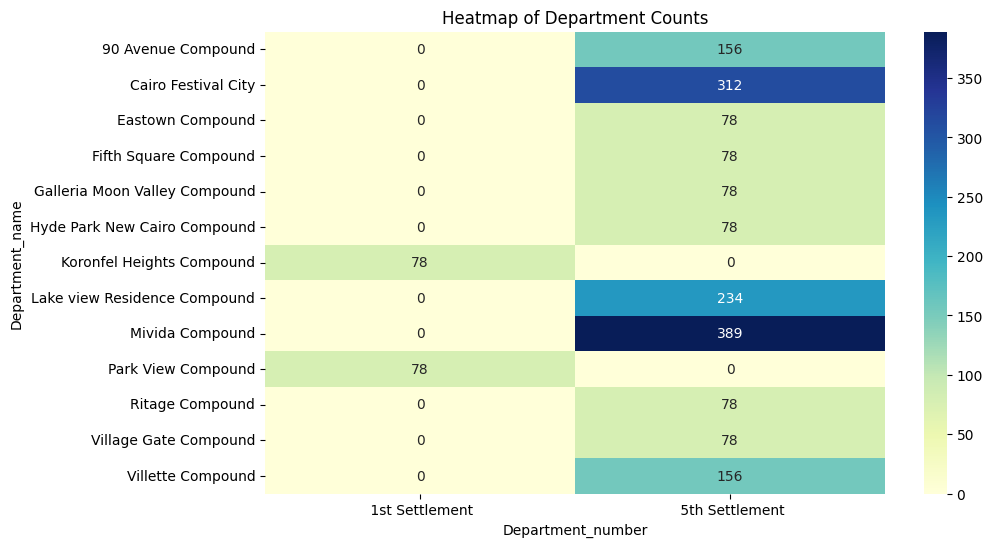

In [83]:
pivot = grouped.pivot(index='Department_name', columns='Department_number', values='Count').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='g', cmap='YlGnBu')
plt.title("Heatmap of Department Counts")
plt.show()


Accuracy: 1.00

Classification Report:


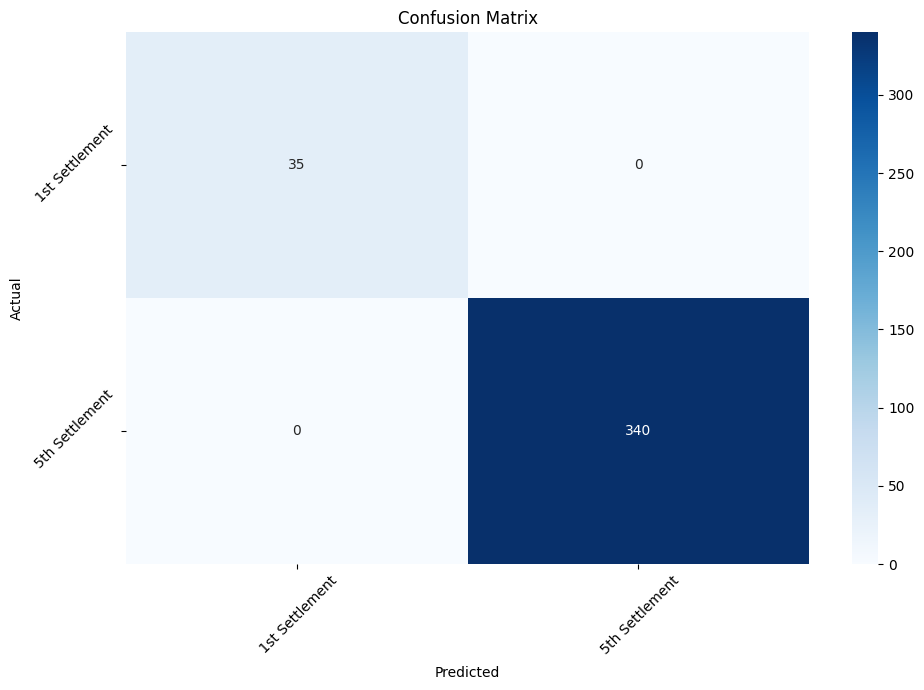

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

df_encoded = df.copy()
le_dept = LabelEncoder()
le_name = LabelEncoder()
le_region = LabelEncoder()

df_encoded['Department_number'] = le_dept.fit_transform(df_encoded['Department_number'])
df_encoded['Department_name'] = le_name.fit_transform(df_encoded['Department_name'])
df_encoded['Regions'] = le_region.fit_transform(df_encoded['Regions'])

X = df_encoded[['Department_name', 'Regions']]
y = df_encoded['Department_number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")
print("\nClassification Report:")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_dept.classes_,
            yticklabels=le_dept.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.savefig('C:/Users/doaad/Documents/NTI data analysis/confusion_matrix.png', format='png', dpi=300)
plt.show()
